In [126]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [127]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

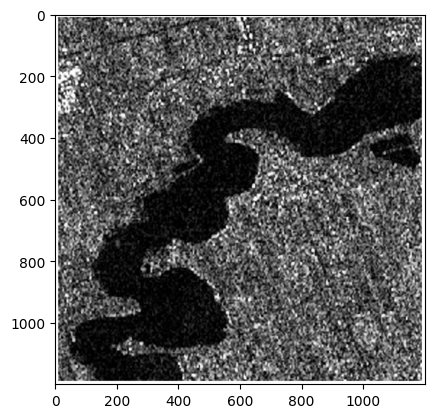

In [128]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [129]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

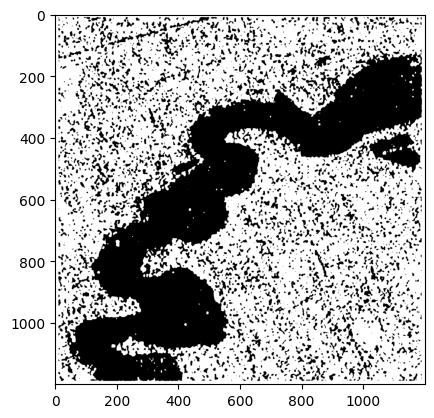

In [130]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [131]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

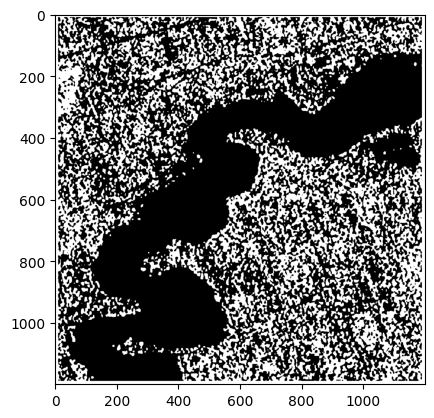

In [132]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [133]:
#
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


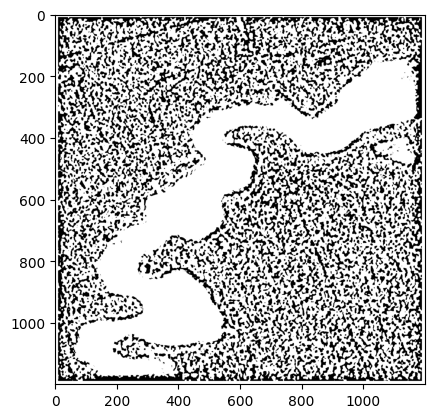

In [134]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [135]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

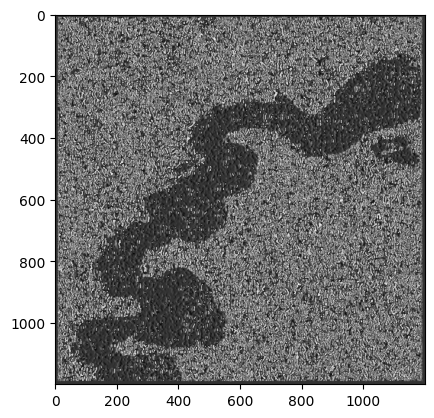

In [136]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

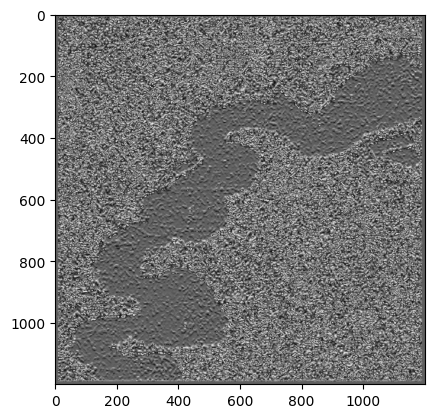

In [137]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [138]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0)

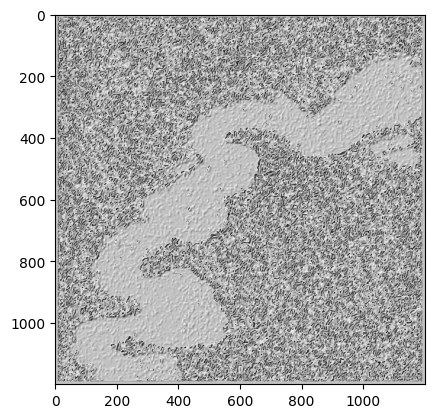

In [139]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [140]:
edges = cv2.Canny(image_gray,100,200)

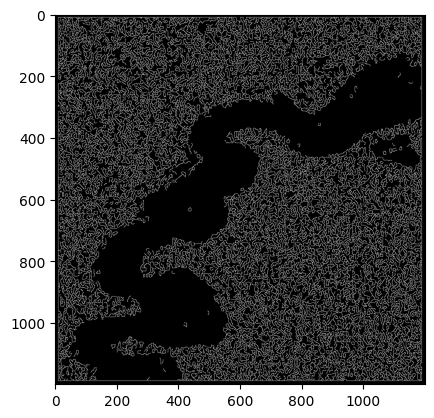

In [141]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [142]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

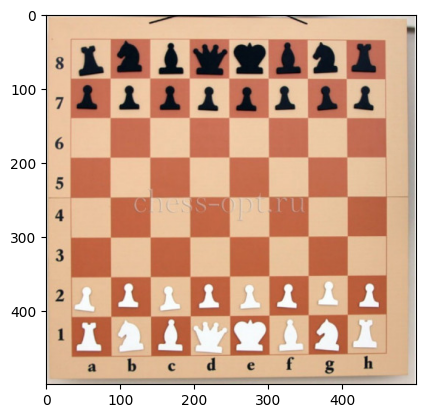

In [143]:
plt.imshow(image)

In [144]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [145]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [146]:
import math

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

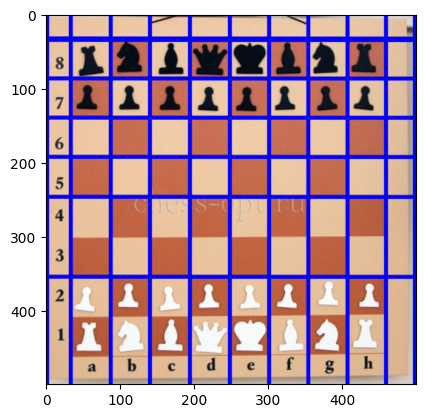

In [147]:
plt.imshow(image)

In [148]:
#ДЗ
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

## 1. Для изображения sar_3.jpg найти наиболее протяженный участок

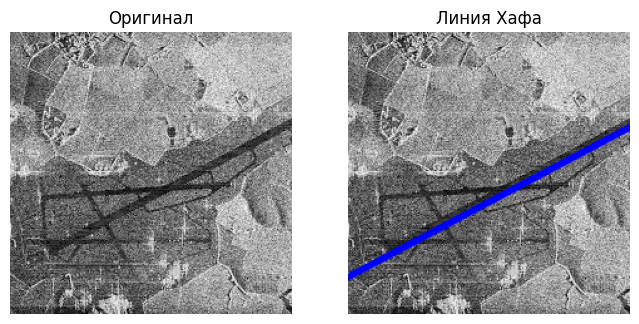

In [149]:
import math
image = cv2.imread('sar_3.jpg')
image_line = image.copy()

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray = cv2.GaussianBlur(image_gray, (5, 5), 3)
canny = cv2.Canny(image_gray,50,100,apertureSize = 3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 110)

if lines is not None:
    longest = None
    max_length = 0
    longest_pt1 = None
    longest_pt2 = None

    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        length = np.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)

        if length > max_length:
            max_length = length
            longest_pt1 = pt1
            longest_pt2 = pt2
            longest = lines[i]

    if longest is not None:
        cv2.line(image_line, longest_pt1, longest_pt2, (0, 0, 255), 4, cv2.LINE_AA)

plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Оригинал')
plt.imshow(image, cmap="gray")
plt.subplot(1,2,2)
plt.axis('off')
plt.title('Линия Хафа')
plt.imshow(image_line, cmap="gray")

## 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [150]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [151]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 65
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

In [152]:
_, th4 = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [153]:
th5 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,501,51)

In [154]:
scale = 0.5
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0)

In [155]:
edges = cv2.Canny(image_gray,100,400)

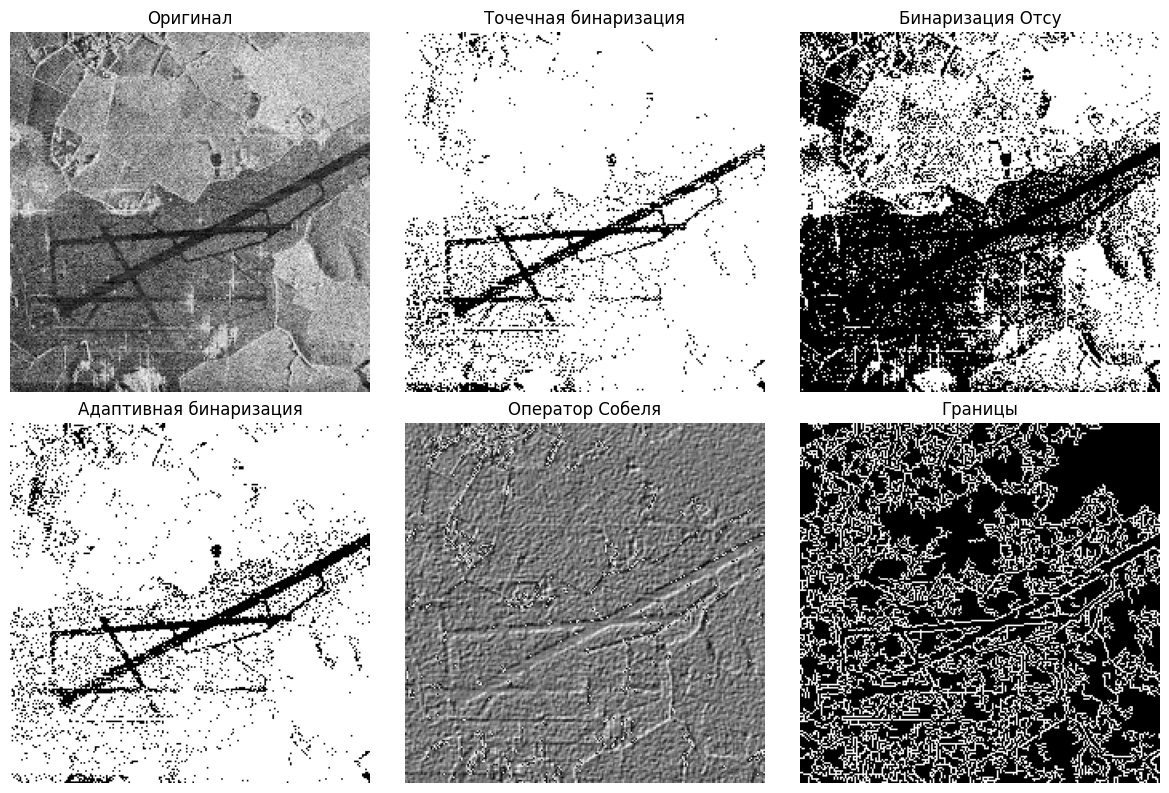

In [156]:
plt.figure(figsize=(12, 8))

plt.subplot(2,3,1)
plt.axis('off')
plt.title('Оригинал')
plt.imshow(image_gray, cmap="gray")

plt.subplot(2,3,2)
plt.axis('off')
plt.title('Точечная бинаризация')
plt.imshow(bin_img, cmap="gray")

plt.subplot(2,3,3)
plt.axis('off')
plt.title('Бинаризация Отсу')
plt.imshow(th4, cmap="gray")

plt.subplot(2,3,4)
plt.axis('off')
plt.title('Адаптивная бинаризация')
plt.imshow(th5, cmap="gray")

plt.subplot(2,3,5)
plt.axis('off')
plt.title('Оператор Собеля')
plt.imshow((grad - grad.min())*255, cmap="gray")

plt.subplot(2,3,6)
plt.axis('off')
plt.title('Границы')
plt.imshow(edges, cmap="gray")

plt.tight_layout()
plt.show()